<h3>Firstly, We will import the required libraries</h3>

In [69]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Now we will read the Survey.csv file into our file object</h3>

In [70]:
file=r"C:\Users\LENOVO\Desktop\Survey.csv"

Making a dataframe from the file object

In [71]:
df=pd.read_csv(file)

Printing the first five rows of the dataframe using the head function

In [72]:
df.head()

,Timestamp,Name,Age,Gender,State,City,Category of products you would prefer to buy.
0,01-08-2021 13:01,Mannat Kaur Boonga,20,Female,Delhi,1,Books
1,01-08-2021 13:17,Gaurav Sharma,27,Male,Delhi,1,OTT subsciptions
2,01-08-2021 13:17,Chinmay Suntha,19,Male,Delhi,1,Vehicles
3,01-08-2021 13:18,Devraj,25,Male,Delhi,1,Sports accessories
4,01-08-2021 13:22,Ravi Rawat,34,Male,Delhi,1,Electronic appliances


In [73]:
df.shape

(83, 7)

Summary of the dataframe

In [74]:
df.describe

<bound method NDFrame.describe of            Timestamp                 Name  Age  Gender    State  City  \
0   01-08-2021 13:01   Mannat Kaur Boonga   20  Female    Delhi     1   
1   01-08-2021 13:17        Gaurav Sharma   27    Male    Delhi     1   
2   01-08-2021 13:17       Chinmay Suntha   19    Male   Delhi      1   
3   01-08-2021 13:18              Devraj    25    Male    Delhi     1   
4   01-08-2021 13:22           Ravi Rawat   34    Male    Delhi     1   
..               ...                  ...  ...     ...      ...   ...   
78  03-08-2021 19:42      Mritunjay Kumar   30    Male    Bihar     3   
79  03-08-2021 21:41     Dharmendra Rawat   29    Male    Delhi     1   
80  03-08-2021 21:42        Aashish Rawat   23    Male    Delhi     1   
81  03-08-2021 21:58              Ranjana   26  Female    Delhi     1   
82  03-08-2021 22:07  Akanksha Chaturvedi   28  Female  Haryana     1   

   Category of products you would prefer to buy.  
0                                     

In [75]:
plt.rcParams["figure.figsize"] = (20,3)


DIstribution of people from different states

Text(0.5, 1.0, 'Number of people from different states')

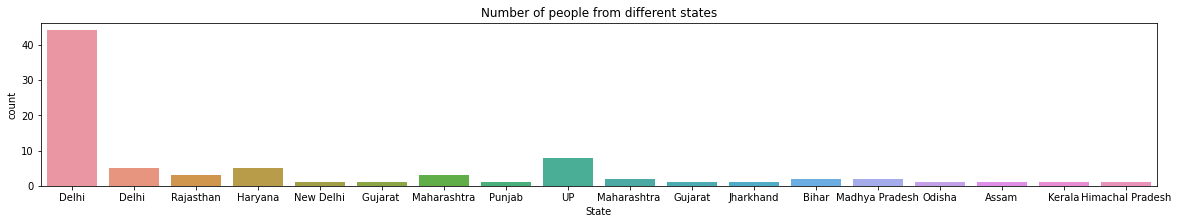

In [76]:
sns.countplot(data=df,x="State")
plt.title("Number of people from different states")

Distribution of people's choice for the given category of products

Text(0.5, 1.0, 'Choices of people')

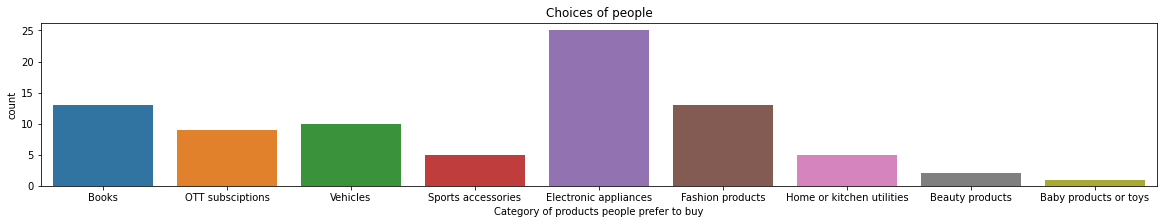

In [77]:
sns.countplot(data=df,x="Category of products you would prefer to buy.")
plt.xlabel("Category of products people prefer to buy")
plt.title("Choices of people")

Distribution of people living in different cities tierwise

Text(0.5, 1.0, 'People from different cities distributed tierwise')

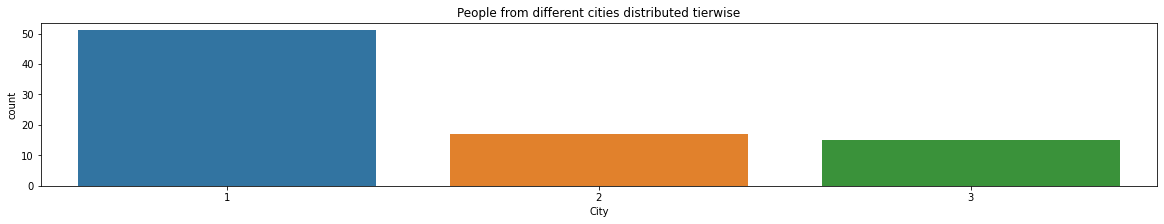

In [78]:
sns.countplot(data=df,x="City")
plt.title("People from different cities distributed tierwise")

Converting string values into numbers using getdummies function.

In [79]:
df1=pd.get_dummies(df["Gender"])
df2=pd.get_dummies(df["State"])
df3=pd.get_dummies(df["City"])
df=pd.concat([df,df1,df2,df3],axis=1)
df.head()

,Timestamp,Name,Age,Gender,State,City,Category of products you would prefer to buy.,Female,Male,Assam,...,Maharashtra,Maharashtra,New Delhi,Odisha,Punjab,Rajasthan,UP,1,2,3
0,01-08-2021 13:01,Mannat Kaur Boonga,20,Female,Delhi,1,Books,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,01-08-2021 13:17,Gaurav Sharma,27,Male,Delhi,1,OTT subsciptions,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,01-08-2021 13:17,Chinmay Suntha,19,Male,Delhi,1,Vehicles,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,01-08-2021 13:18,Devraj,25,Male,Delhi,1,Sports accessories,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,01-08-2021 13:22,Ravi Rawat,34,Male,Delhi,1,Electronic appliances,0,1,0,...,0,0,0,0,0,0,0,1,0,0


<h3>Now we will use Age,Gender,State and City of the person to predict the category of product he or she would prefer to buy.
 So, we will make two dataframes containing the variables that will be used as predictors and the target variable respectively.</h3>


In [86]:
x=df[["Age","Male","Female","City"]] #Predictor variables
y=df[["Category of products you would prefer to buy."]] #Target variable whose value is to be predicted

<h3>Now we will use the train_test_split to split our dataset into two parts.</h3

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

<h2>K Neighbours Classifier</h2>

In [89]:
neigh=KNeighborsClassifier(n_neighbors=6).fit(X_train,Y_train)
neigh

C:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [90]:
yhat=neigh.predict(X_test)
print(yhat)

['Electronic appliances' 'Electronic appliances' 'Books'
 'Electronic appliances' 'Electronic appliances' 'Books' 'Books'
 'Vehicles' 'Electronic appliances' 'Electronic appliances' 'Vehicles'
 'Vehicles' 'Electronic appliances' 'Books' 'Vehicles' 'Vehicles'
 'Home or kitchen utilities']


<h2>Logistic Regression</h2>

In [92]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.01,solver="liblinear").fit(X_train,Y_train)
LR

C:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.01, solver='liblinear')

In [93]:
yhatLR=LR.predict(X_test)
yhatLR

array(['Electronic appliances', 'Electronic appliances',
       'Electronic appliances', 'Electronic appliances',
       'Electronic appliances', 'Electronic appliances',
       'Electronic appliances', 'Electronic appliances',
       'Electronic appliances', 'Electronic appliances',
       'Electronic appliances', 'Electronic appliances',
       'Electronic appliances', 'Electronic appliances',
       'Electronic appliances', 'Electronic appliances',
       'Electronic appliances'], dtype=object)

<h2>Decision Tree Classifier</h2>

In [97]:
tree=DecisionTreeClassifier()
tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [98]:
pred_tree=tree.predict(X_test)
pred_tree

array(['OTT subsciptions', 'Electronic appliances', 'Fashion products',
       'Electronic appliances', 'Electronic appliances',
       'Fashion products', 'Fashion products', 'Fashion products',
       'Electronic appliances', 'Electronic appliances',
       'Fashion products', 'Fashion products', 'OTT subsciptions',
       'Beauty products', 'Fashion products', 'Fashion products',
       'Home or kitchen utilities'], dtype=object)